1.Draw your own random landscape with hills and water like below using contour plot. The curves should look smooth without grid. Add elevation labels to the contour lines but do not show contour below the blue water level. The hills have a gradient color as in an "AR sandbox".
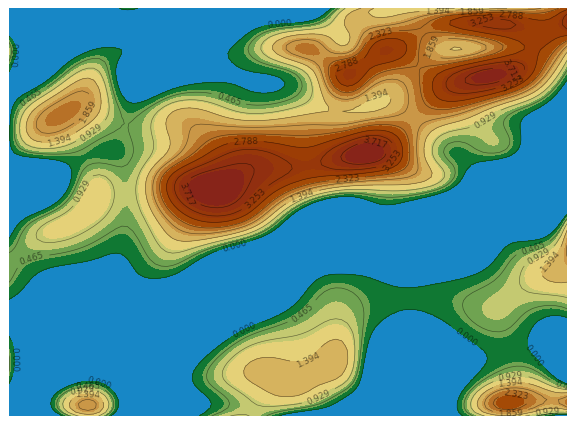

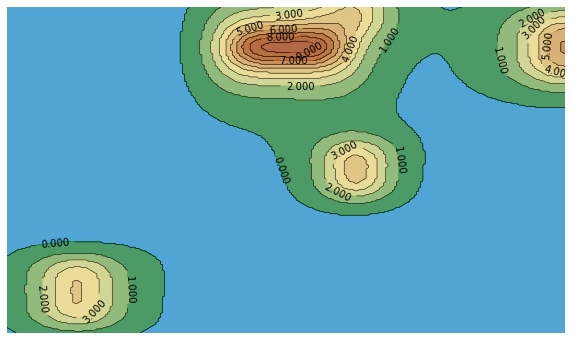

In [15]:
# Your Code Below
import numpy as np
import matplotlib.pyplot as plt



def f(x, y):
    a = np.random.randint(-4,4,5)
    b = np.random.randint(-4,4,5)
    o1 = 1000/(2*(x+a[0])**4+3*(y+b[0])**2+1)
    o2 = 500/(3*(x+a[1])**2+2*(y+b[1])**4+1)
    o3 = 700/(3*(x+a[2])**2+2*np.abs(y+b[2])**3+1)
    o4 = 500/(3*(x+a[3])**2+2*np.abs(y+b[3])**3+1)**1.5
    o5 = 300/(3*(x+a[4])**2+2*np.abs(y+b[4])**3+1)**1.5
    return o1+o2+o3+o4+o5
    

# 数据数目
n = 256
# 定义x, y
x = np.linspace(-4, 4, n)
y = np.linspace(-4, 4, n)
X,Y = np.meshgrid(x,y)

# print(X)
# print(Y)

fig = plt.figure(figsize = (10,6))

ax=plt.subplot()
Z = f(X,Y)
Z = Z.astype(int)
Z = Z//100

countline = ax.contourf(X,Y,Z,[float('-inf'),0,1,2,3,4,5,6,7,8,9,10,float('inf')],alpha = 0.75,
            colors=('#1787c6','#107833','#6fa351',
                    '#c4c971','#e5d178','#d6b35e','#ca9747',
                    '#b77127','#a44a06','#9c3d05','#97370a',
                    '#912f10','#872419')) 
#or cmap='hot'

#画出8条线，并将颜色设置为黑色
ct = ['0000','0200','0400','0600','0800','1000','1200','1400','1600']
CS = ax.contour(X,Y,Z,countline.levels,colors = 'k',linewidths = 0.5)
#等高线上标明z（即高度）的值，字体大小是10，颜色分别是黑色和红色
plt.clabel(CS,CS.levels,inline = True,fontsize=10,colors='k')
#去掉坐标轴刻度
plt.xticks(())  
plt.yticks(())  


ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)


plt.show()


2. The heart function is the scalar function $F=(x^2+\frac{9}{4}y^2+z^2-1)^3-x^2 z^3-\frac{9}{80}y^2 z^3$. When $F=0$, the function describes a heart shape surface in the 3D space. In this excercise, you will use this function to plot a 3D heart using the module called `measure`, and the 3D plot techniques you have learnt in the lecture.  
The code below creates the plotting data for `plot_trisurf(X,Y,faces,Z)` with `X=verts[:,0]`, `Y=verts[:,1]`, `Z=verts[:,2]`. The faces parameter is optional for trisurf, but it makes the figure look better by choosing the triangular surfaces created by the `measure.marching_cubes` function.  
Hint: Marching cubes is a simple algorithm for creating a triangle mesh from an implicit function (one of the form $f(x, y, z) = 0$). Since the marching_cubes function only takes in the value of $F$ but not $x, y, z$, the resultant points all range from 0 to the number of total points in the corresponding direction times the spacing among the points (6/100 in the following code), so you will need to shift the data to make it centered around 0.

In [2]:
# Do not modify this cell

import numpy as np
from skimage import measure

# Define the heart function 
def F(x,y,z):
    return (x**2 + 9*y**2/4 + z**2-1)**3 - x**2 * z**3 - 9*y**2 * z**3/80
    
# Set up mesh
n = 100

x = np.linspace(-3,3,n)
y = np.linspace(-3,3,n)
z = np.linspace(-3,3,n)
X, Y, Z =  np.meshgrid(x, y, z, indexing='ij')

vol = F(X,Y,Z)

# Extract a 2D surface mesh from a 3D volume (F=0)
verts, faces, _, _ = measure.marching_cubes(vol, 0, spacing=(6/n, 6/n, 6/n))

For this problem, you will create a 3D figure of the size 8 by 8. Plot the data obtained in the previous cell using `ax.plot_trisurf(X,Y,faces,Z)`. Modify the `plot_trisurf` to use color map `'Spectral'`. Try to shift the heart surface so that it is centered at the origin. Set the title to be "Love from XXX" with XXX being your name. Set the view angle to be (15, -70).  
As the last step of this problem, draw the cross-section of the 3D heart intersecting with the $y=0$ plane on the right-hand-side wall of the same figure using `contour3D` with the parameter `zdir='y'` and `levels=0` in red color. To make the projection visible, set the opacity of the 3D heart to `alpha=0.8`.  
Your output should look like this:
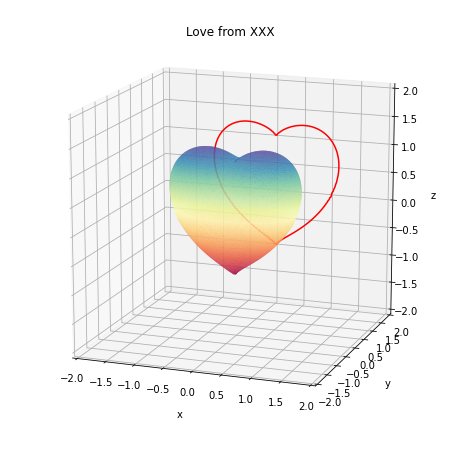

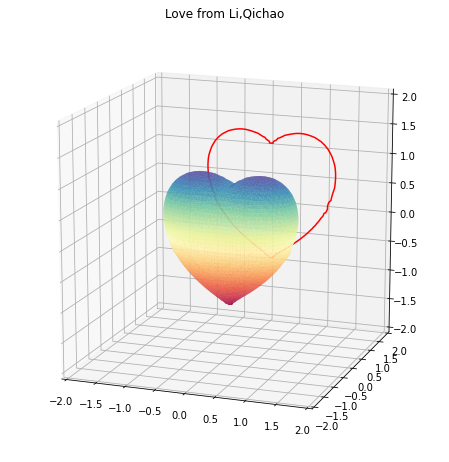

In [5]:
# Your Code Here
import matplotlib.pyplot as plt
import numpy as np 
from mpl_toolkits import mplot3d

def F(x,z):
    return (x**2 + z**2-1)**3 - x**2 * z**3
    
fig = plt.figure(figsize=(8,8))
ax = plt.subplot(projection = '3d')
ax.plot_trisurf(verts[:,0]-np.mean(verts[:,0]),verts[:,1]-np.mean(verts[:,1]),faces,verts[:,2]-np.mean(verts[:,2]),cmap = 'Spectral',alpha=0.8)
ax.set_title('Love from Li,Qichao',pad = -50)
ax.view_init(15,-70)
tick = np.arange(-2,2.5,0.5)
ax.set_xticks(tick)
ax.set_xlim(-2,2)
ax.set_yticks(tick)
ax.set_ylim(-2,2)
ax.set_zticks(tick)
ax.set_zlim(-2,2)
x = np.linspace(-3,3,n)
z = np.linspace(-3,3,n)
X, Z =  np.meshgrid(x, z)
Y = F(X,Z)

ax.contour3D(X,Y,Z,0,zdir = 'y',offset = 2,colors= 'red')
ax.set_box_aspect([1,1,1])
plt.show()

3. Make the following video. The converging point should rotate 1 complete circle in 100 time steps or frames. Display the animation by `matplotlib.animation.FuncAnimation` and `%matplotlib notebook`, and also save it as "sin_cos_movie" in both gif and mp4 formats. Your output should look like this:
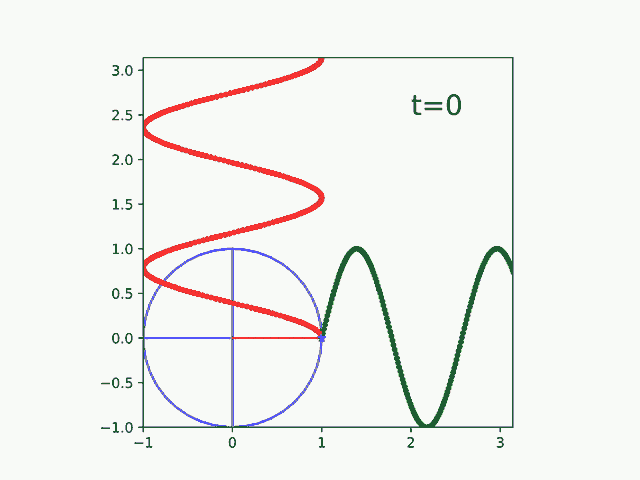

#### Note:You also need to make both gif and mp4 for the sin_cos_movie and upload/submit them togeter.

<IPython.core.display.Javascript object>


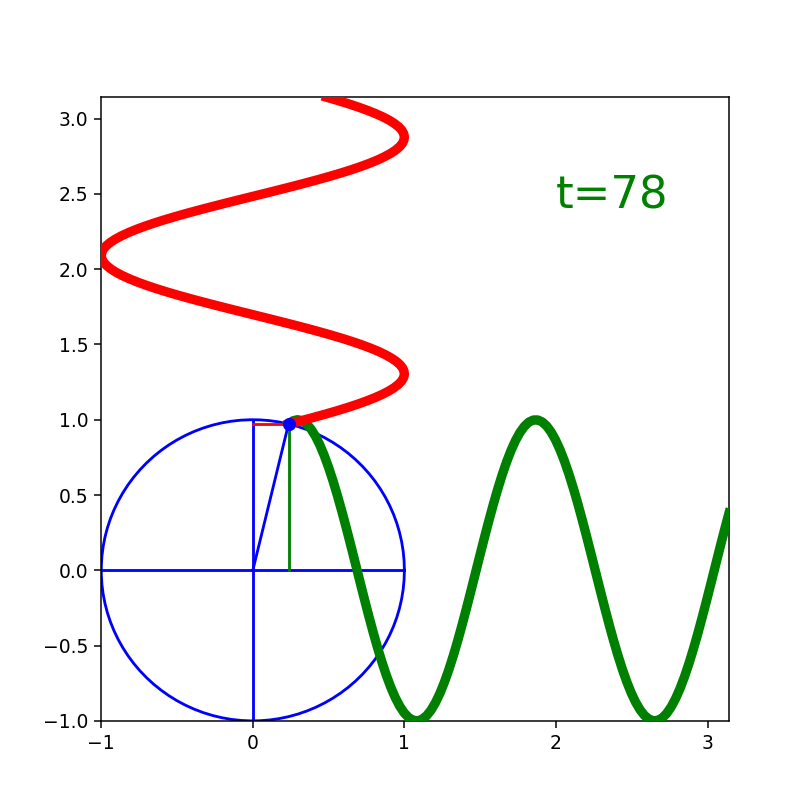

In [6]:
# Your Code Here
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
fig,ax = plt.subplots(figsize = (6,6))
text_step = plt.text(2,2.4,'t',color = 'g',fontsize = 24)
ln0, = plt.plot([],[],'b-')
ln01, = plt.plot([],[],'b-')
ln02, = plt.plot([],[],'b-')
ln1, = plt.plot([],[],'r-',lw=5,zorder = 500)
ln2, = plt.plot([],[],'g-',lw=5,zorder = 300)
ln3, = plt.plot([],[],'b-',zorder = 100)
ln4, = plt.plot([],[],'g-',zorder = 200)
ln5, = plt.plot([],[],'r-',zorder = 400)
ln6, = ax.plot([],[],c = 'b',marker = 'o',zorder = 600)
theta = np.linspace(0, -2*np.pi, 100)
# ax.axis("auto")
def init():
    ax.set_yticks(np.arange(-1,3.5,0.5))
    ax.set_xticks(np.arange(-1,3.5,1))
    ax.set_xlim(-1,np.pi)
    ax.set_ylim(-1,np.pi)
    x = 1 * np.cos(theta)
    y = 1 * np.sin(theta)
    ln0.set_data(x,y)
    ln01.set_data([-1,1],[0,0])
    ln02.set_data([0,0],[-1,1])
    return ln0,ln01,ln02,text_step

def update(i):
    dot = [np.cos(theta[i]),np.sin(theta[i])]
    ln3.set_data([0,np.cos(theta[i])],[0,np.sin(theta[i])])
    ln4.set_data([np.cos(theta[i]),np.cos(theta[i])],[0,np.sin(theta[i])])
    x2 = np.linspace(np.cos(theta[i]),np.pi,100)
    y2 = np.sin(x2*4+theta[i]-4*np.cos(theta[i]))
    ln2.set_data(x2,y2)
    ln5.set_data([0,np.cos(theta[i])],[np.sin(theta[i]),np.sin(theta[i])])
    y3 = np.linspace(np.sin(theta[i]),np.pi,100)
    x3 = np.sin(y3*4+np.arcsin(np.cos(theta[i]))-4*np.sin(theta[i]))
    ln1.set_data(x3,y3)
    ln6.set_data(np.cos(theta[i]),np.sin(theta[i]))
    text_step.set_text('t='+str(i))
    return ln1,ln2,ln3,ln4,ln5,ln6

ani = FuncAnimation(fig, update, range(len(theta)), init_func=init, interval=100)
ani.save('sin_cos_movie.gif', writer='ffmpeg', fps=100)
ani.save('sin_cos_movie.mp4', writer='ffmpeg', fps=100)
plt.show()